## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, RNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures

# Dataset Selection & Analysis

## Import Dataset

In [68]:
df = pd.read_csv('honey_purity_dataset.csv')

## Dataset Analysis

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [70]:
df.shape

(247903, 11)

In [71]:
categorical_cols = df.dtypes[df.dtypes == 'object'].index.to_list()
print(f'\n There are {len(categorical_cols)} Cateogrical Columns in Dataset')

numerical_cols = df.dtypes[df.dtypes != 'object'].index.to_list()
print(f'\n There are {len(numerical_cols)} Numerical Columns in Dataset')


 There are 1 Cateogrical Columns in Dataset

 There are 10 Numerical Columns in Dataset


Observations:

- Data set contains 247902 observations and 11 variables
- 10 variables are numerical and 1 variable is categorical.
- need to drop unnecessary columns

# Data Cleaning

In [72]:
df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df.nunique()

CS                    901
Density                66
WC                   1301
pH                    501
EC                     21
F                    3001
G                    2501
Pollen_analysis        19
Viscosity          215083
Purity                 24
Price                 708
dtype: int64

Observation:

- No null values in dataset
- No duplicate values in dataset

# Data Exploration and Feature Engineering

CS (Color Score):
Represents the color score of the honey sample, ranging from 1.0 to 10.0. Lower values indicate a lighter color, while higher values indicate a darker color.

Density:
Represents the density of the honey sample in grams per cubic centimeter at 25°C, ranging from 1.21 to 1.86.

WC (Water Content):
Represents the water content in the honey sample, ranging from 12.0% to 25.0%.

pH:
Represents the pH level of the honey sample, ranging from 2.50 to 7.50.

EC (Electrical Conductivity):
Represents the electrical conductivity of the honey sample in milliSiemens per centimeter.

F (Fructose Level):
Represents the fructose level of the honey sample, ranging from 20 to 50.

G (Glucose Level):
Represents the glucose level of the honey sample, ranging from 20 to 45.

Pollen_analysis:
Represents the floral source of the honey sample. Possible values include Clover, Wildflower, Orange Blossom, Alfalfa, Acacia, Lavender, Eucalyptus, Buckwheat, Manuka, Sage, Sunflower, Borage, Rosemary, Thyme, Heather, Tupelo, Blueberry, Chestnut, and Avocado.

Viscosity:
Represents the viscosity of the honey sample in centipoise, ranging from 1500 to 10000. Viscosity values between 2500 and 9500 are considered optimal for purity.

Purity:
The target variable represents the purity of the honey sample, ranging from 0.01 to 1.00.

Price:
The calculated price of the honey.

### Change the Column names to meaningful names

In [75]:
df.rename(columns= {'CS': "Color Score", 'WC': "Water Content",  'EC': "Electrical Conductivity", 'F':"Fructose Level", 'G': "Glucose Level", "Pollen_analysis":'Pollen Analysis',},inplace=True)

In [76]:
df.head()

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Pollen Analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [77]:
df.drop('Price', axis=1, inplace=True)

## Numerical Data Analysis

In [78]:
df.describe()

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Purity
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000


Observation:
There are no Outliers in dataset

In [79]:
num_features = ['Color Score', 'Density', 'Water Content', 'pH', 'Electrical Conductivity', 'Fructose Level', 'Glucose Level', 'Viscosity', 'Purity']
cat_features = ["Pollen Analysis"]

In [80]:
df['Pollen Analysis'].unique()

array(['Blueberry', 'Alfalfa', 'Chestnut', 'Borage', 'Sunflower',
       'Orange Blossom', 'Acacia', 'Tupelo', 'Clover', 'Wildflower',
       'Thyme', 'Sage', 'Avocado', 'Lavender', 'Eucalyptus', 'Buckwheat',
       'Rosemary', 'Heather', 'Manuka'], dtype=object)

## Visualizations

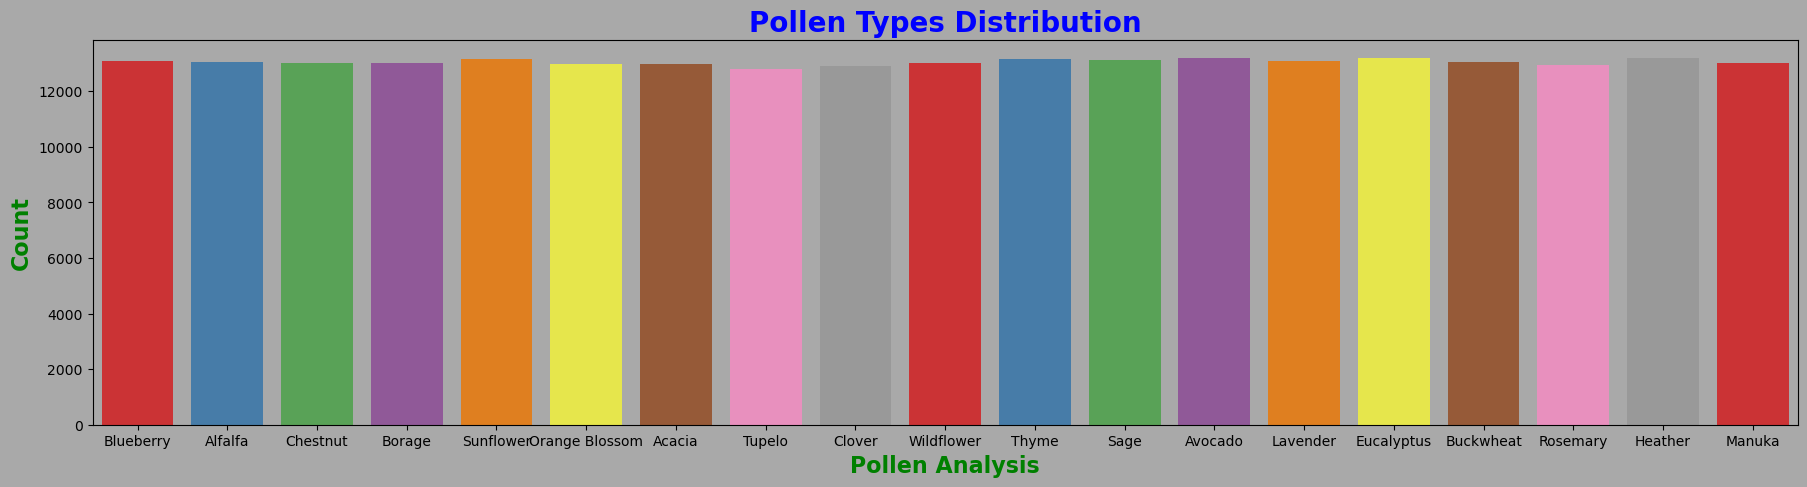

In [143]:
plt.figure(figsize=(22, 5))
ax = sns.countplot(x=df["Pollen Analysis"], palette='Set1')
ax.set_facecolor ("darkgrey")
plt.gcf().set_facecolor('darkgrey')
plt.title("Pollen Types Distribution", color = "blue", fontweight = "bold", fontsize = 20)
plt.ylabel('Count', color = "green", fontweight = "bold", fontsize = 16)
plt.xlabel("Pollen Analysis", color = "green", fontweight = "bold", fontsize = 16)
plt.show()

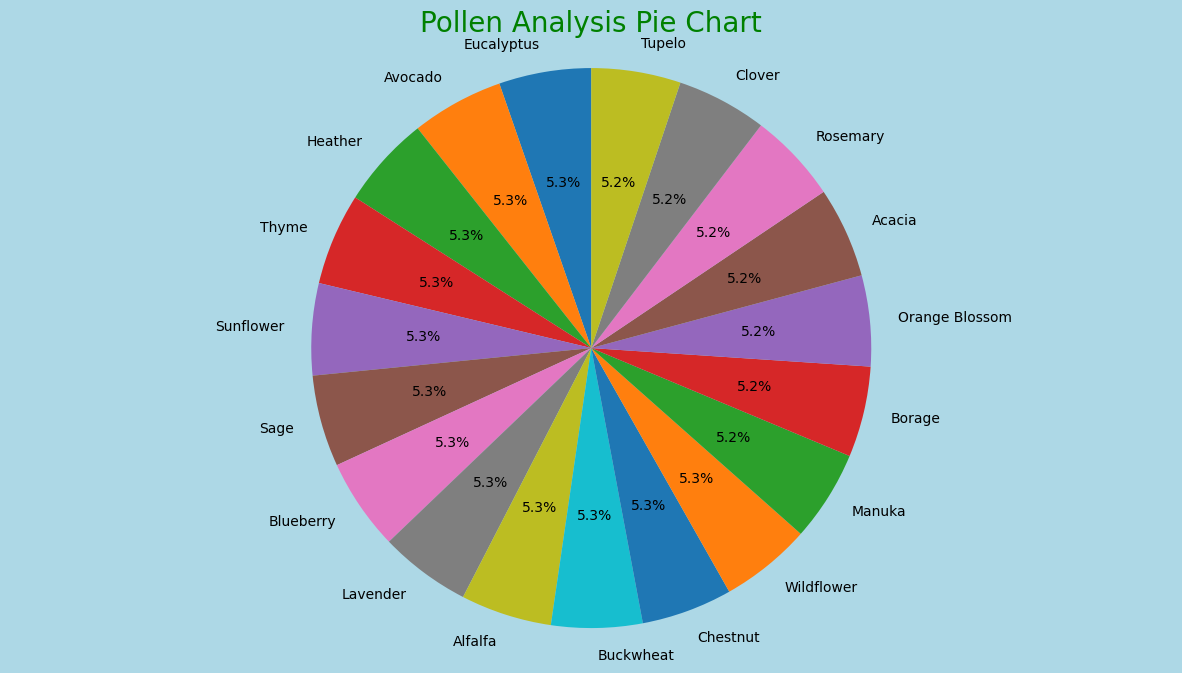

In [194]:
pollen_analysis = df["Pollen Analysis"].value_counts().to_dict()
plt.figure(figsize = (15, 8))
plt.pie(pollen_analysis.values(), labels = pollen_analysis.keys(), autopct = '%1.1f%%', startangle = 90)
plt.title('Pollen Analysis Pie Chart', color = 'green', fontsize = 20)
plt.axis('equal')
plt.gcf().set_facecolor('lightblue')


plt.show()

Observation:
By seeing the pie chart all the floral source of honey are almost eqaully contributed in this dataset.

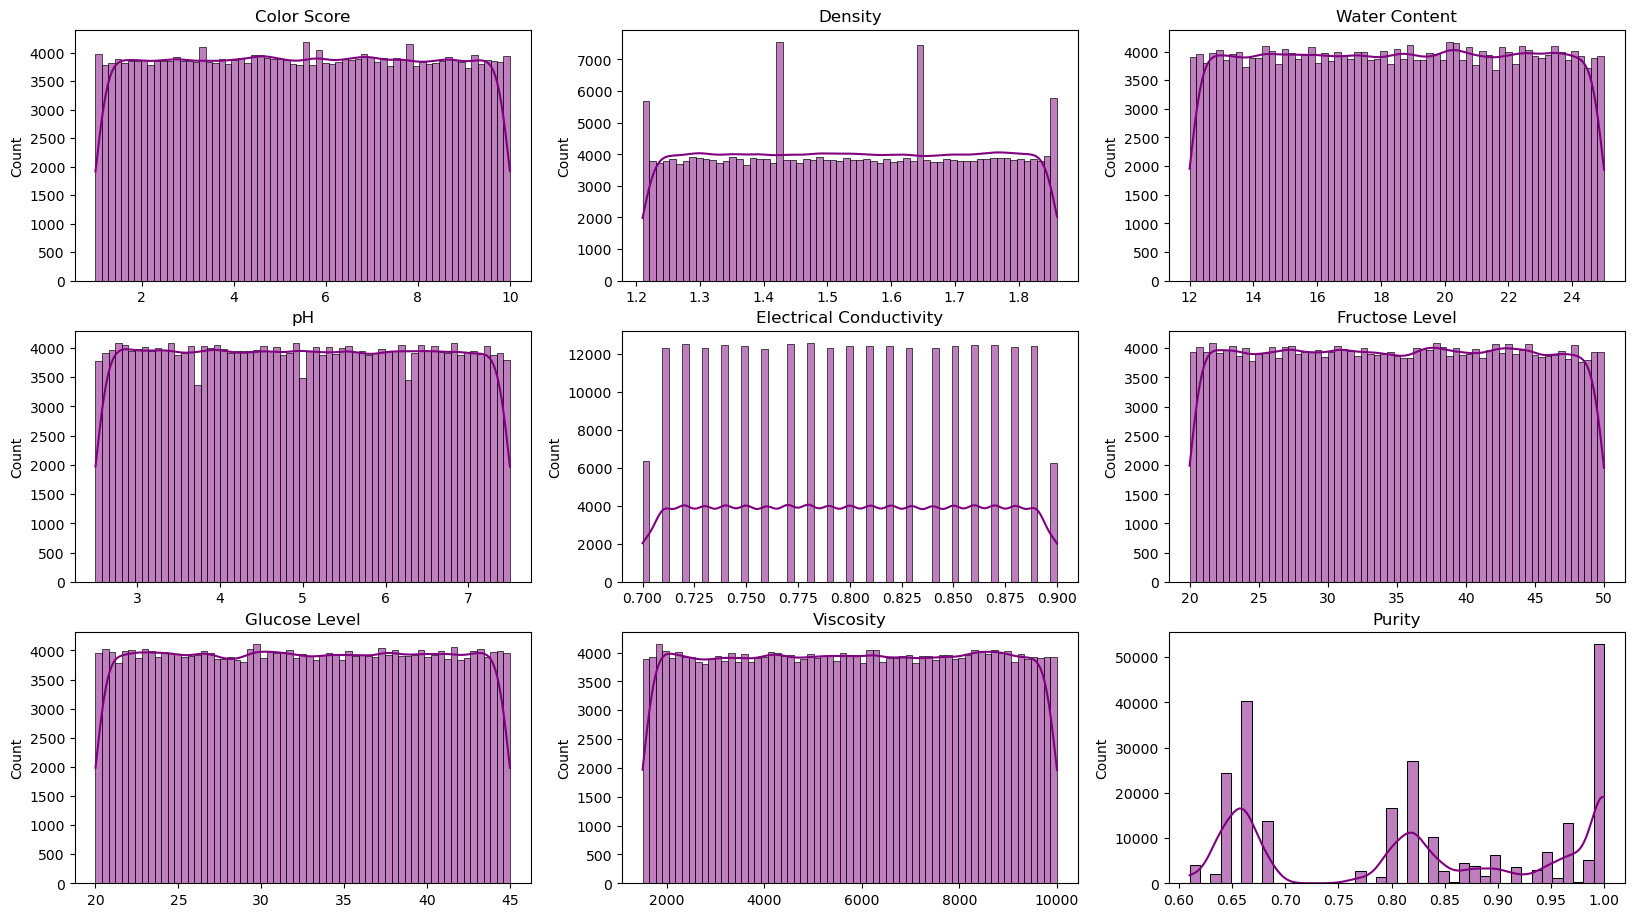

In [171]:
plt.figure(figsize=(20, 15))
i = 1
for  variable in (num_features):
    plt.subplot(4,3, i)
    sns.histplot(x = df[variable],kde = True, color = "purple")
    plt.title(variable)
    i += 1
    plt.xlabel('')
plt.show()

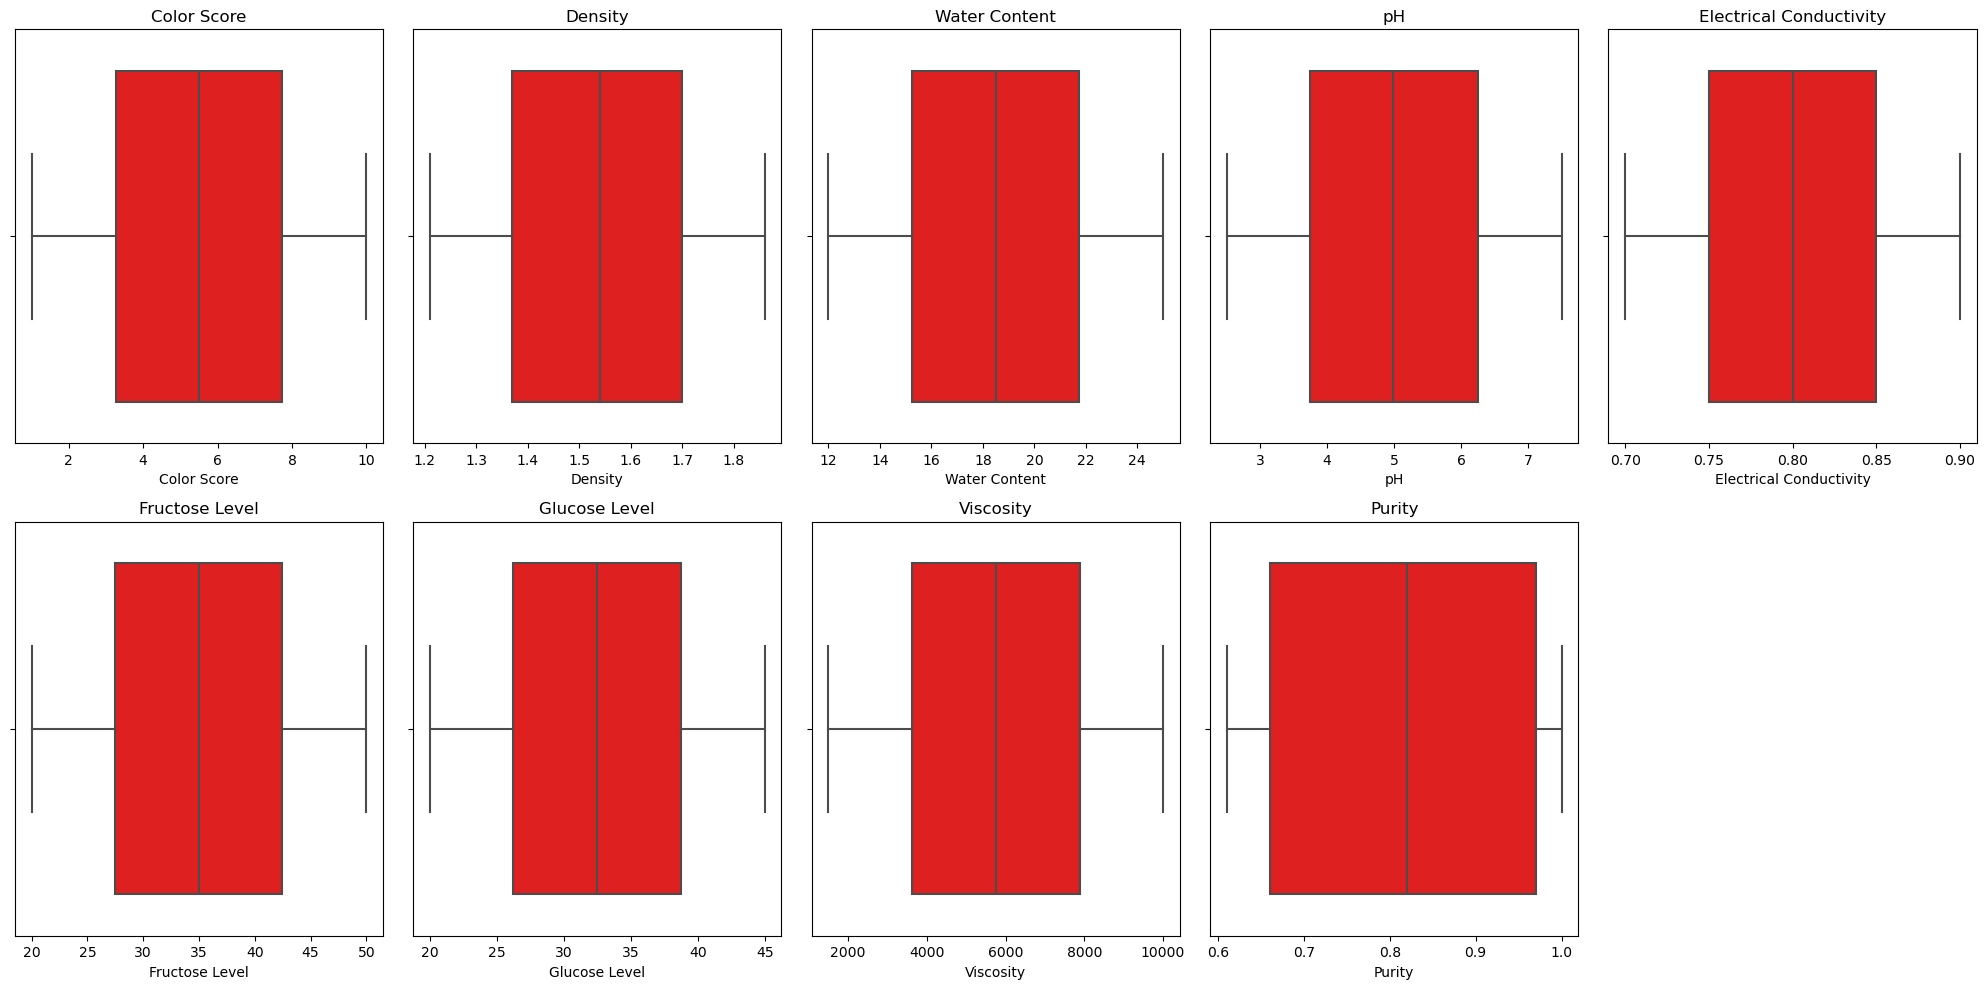

In [169]:
plt.figure(figsize = (20, 10))
i = 1
for  variable in (num_features):
    plt.subplot(2,5, i)
    sns.boxplot(x=df[variable],color = "red")
    plt.title(variable)
    i+= 1
plt.tight_layout()
plt.show()

Observation:
- No outliers in data

# Machine Learnig & Deep Learning Models

### Standard Scaling

In [84]:
num_cols = ['Color Score', 'Density', 'Water Content', 'pH', 'Electrical Conductivity', 'Fructose Level', 'Glucose Level', 'Viscosity']
cat_cols = ["Pollen Analysis"]
df_num = df[num_cols]
df_cat = df[cat_cols]

In [85]:
df_cat_enc = pd.get_dummies(df_cat, columns = cat_cols).astype(int)

In [86]:
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=num_cols)

In [196]:
final_df = pd.concat([df_num, df_cat_enc], axis=1)
final_df.columns

Index(['Color Score', 'Density', 'Water Content', 'pH',
       'Electrical Conductivity', 'Fructose Level', 'Glucose Level',
       'Viscosity', 'Pollen Analysis_Acacia', 'Pollen Analysis_Alfalfa',
       'Pollen Analysis_Avocado', 'Pollen Analysis_Blueberry',
       'Pollen Analysis_Borage', 'Pollen Analysis_Buckwheat',
       'Pollen Analysis_Chestnut', 'Pollen Analysis_Clover',
       'Pollen Analysis_Eucalyptus', 'Pollen Analysis_Heather',
       'Pollen Analysis_Lavender', 'Pollen Analysis_Manuka',
       'Pollen Analysis_Orange Blossom', 'Pollen Analysis_Rosemary',
       'Pollen Analysis_Sage', 'Pollen Analysis_Sunflower',
       'Pollen Analysis_Thyme', 'Pollen Analysis_Tupelo',
       'Pollen Analysis_Wildflower'],
      dtype='object')

In [90]:
final_df

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Pollen Analysis_Acacia,Pollen Analysis_Alfalfa,...,Pollen Analysis_Heather,Pollen Analysis_Lavender,Pollen Analysis_Manuka,Pollen Analysis_Orange Blossom,Pollen Analysis_Rosemary,Pollen Analysis_Sage,Pollen Analysis_Sunflower,Pollen Analysis_Thyme,Pollen Analysis_Tupelo,Pollen Analysis_Wildflower
0,-1.037132,1.141911,1.210410,0.896054,-0.690263,0.467824,0.156235,-0.369907,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.530390,1.514602,-0.267465,1.526222,-1.553653,0.367314,0.264174,0.381200,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.343207,1.621085,1.391809,1.602397,0.000449,-0.866529,0.257255,0.460435,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.438066,-0.721543,-0.504885,-0.682831,-0.344907,-0.398639,-0.602109,0.576066,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.235064,-1.520166,0.300743,-0.121912,1.727230,-0.614677,1.386467,-0.255506,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247898,-1.357108,-1.307200,-0.160759,-0.121912,1.554552,0.130481,0.302921,1.021583,0,0,...,0,0,0,0,1,0,0,0,0,0
247899,0.262050,0.715979,0.276734,-0.059587,0.863839,-0.441385,-1.616463,0.483153,1,0,...,0,0,0,0,0,0,0,0,0,0
247900,0.878871,-0.242369,-0.726299,0.480558,-1.208297,1.112472,1.600962,-0.656872,0,0,...,0,0,0,0,0,0,0,0,0,0
247901,0.107844,1.088670,-0.945046,1.256150,0.518483,1.411691,0.731911,-0.543688,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split Data into Input & Target variables

In [91]:
X = final_df
y = df['Purity']

### Split Data into Train & Test data

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
print(final_df.shape, X_train.shape)

(247903, 27) (198322, 27)


In [149]:
# Check for NaNs and Infs in X_train_scaled
print("Any NaNs in X_train:", np.isnan(X_train).any())
print("Any Infs in X_train:", np.isinf(X_train).any())

# Check for NaNs and Infs in y_train
print("Any NaNs in y_train:", np.isnan(y_train).any())
print("Any Infs in y_train:", np.isinf(y_train).any())

Any NaNs in X_train: Color Score                       False
Density                           False
Water Content                     False
pH                                False
Electrical Conductivity           False
Fructose Level                    False
Glucose Level                     False
Viscosity                         False
Pollen Analysis_Acacia            False
Pollen Analysis_Alfalfa           False
Pollen Analysis_Avocado           False
Pollen Analysis_Blueberry         False
Pollen Analysis_Borage            False
Pollen Analysis_Buckwheat         False
Pollen Analysis_Chestnut          False
Pollen Analysis_Clover            False
Pollen Analysis_Eucalyptus        False
Pollen Analysis_Heather           False
Pollen Analysis_Lavender          False
Pollen Analysis_Manuka            False
Pollen Analysis_Orange Blossom    False
Pollen Analysis_Rosemary          False
Pollen Analysis_Sage              False
Pollen Analysis_Sunflower         False
Pollen Analysis_Thy

### Linear Regression Model

In [96]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression R2 Score: {r2_score(y_test, y_pred_lr):.4}")

Linear Regression R2 Score: 0.07337


### XGBoost Regressor

In [98]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
print(f"XGBoost R2 Score: {r2_score(y_test, y_pred_xgb):.4}")

XGBoost R2 Score: 0.9785


### Gradient Boosting Regressor

In [99]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print(f"GBR R2 Score: {r2_score(y_test, y_pred_gbr):.4}")

GBR R2 Score: 0.9528


### Decision Tree Regressor

In [100]:
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dt_reg.fit(X_train, y_train)
y_pred_dtr = dt_reg.predict(X_test)
print(f"Decision Tree Regressor R2 Score: {r2_score(y_test, y_pred_dtr):.4}")

Decision Tree Regressor R2 Score: 0.8551


### Random Forest Regressor

In [101]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print(f"Random Forest Regressor R2 Score: {r2_score(y_test, y_pred_rfr):.4}")

Random Forest Regressor R2 Score: 0.9814


### AdaBoost Regressor

In [102]:
ada_reg = AdaBoostRegressor(n_estimators=3, random_state=42)
ada_reg.fit(X_train, y_train)
y_pred_ada = ada_reg.predict(X_test)
print(f"ADABoost Regressor Accuracy: {r2_score(y_test, y_pred_ada):.4}")

ADABoost Regressor Accuracy: 0.5932


### Polynomial Regression

In [103]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
X_poly_test = poly.transform(X_test)
y_pred_poly = poly_reg.predict(X_poly_test)
print(f"Polynomial Regression R2 Score: {r2_score(y_test, y_pred_poly):.4f}")


Polynomial Regression R2 Score: 0.2880


## Regularization

### Lasso for Linear Regression

In [104]:
ls = Lasso(alpha=0.001)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)
print(f"Lasso Regularization R2 Score: {r2_score(y_test, y_pred_ls):.4}")

Lasso Regularization R2 Score: 0.07326


## Hyperparameter Tunning

### GridSearchCV fro Linear Regression with Lasso

In [105]:
parameters = {'alpha': [0.01, 0.1, 1, 10, 100],
             'random_state':[42]}
grid_ls = GridSearchCV(estimator = ls, param_grid = parameters, cv = 5)
grid_ls.fit(X_train, y_train)
best_params_ls = grid_ls.best_params_
accuracy_ls = grid_ls.best_score_
print(f'Best Hyperparameters: {best_params_ls}\n')
print(f'Accuracy for Linear Regression using GridSearchCV with Lasso: {accuracy_ls: .4}')

Best Hyperparameters: {'alpha': 0.01, 'random_state': 42}

Accuracy for Linear Regression using GridSearchCV with Lasso:  0.05561


### GridSearchCV fro XGBoost Regressor

In [106]:
parameters_xgb = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
             'random_state':[42]}
grid_xgb = GridSearchCV(estimator = xgb_reg, param_grid = parameters_xgb, cv = 5)
grid_xgb.fit(X_train, y_train)
best_params_grid_xgb = grid_xgb.best_params_
best_score_grid_xgb = grid_xgb.best_score_
print(f'Best Hyperparameters: {best_params_grid_xgb}\n')
print(f"Accuray for XGBoost using GridSearchCV: {best_score_grid_xgb:.4}")

Best Hyperparameters: {'alpha': 0.1, 'random_state': 42}

Accuray for XGBoost using GridSearchCV: 0.9781


## ANN Model

In [116]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=150, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = optimizer, loss = 'binary_crossentropy')

ann_model = ann.fit(X_train, y_train, batch_size = 64, epochs = 50, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4392 - val_loss: 0.3999
Epoch 2/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3994 - val_loss: 0.3920
Epoch 3/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3904 - val_loss: 0.3890
Epoch 4/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.3890 - val_loss: 0.3873
Epoch 5/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3875 - val_loss: 0.3880
Epoch 6/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3864 - val_loss: 0.3860
Epoch 7/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3861 - val_loss: 0.3856
Epoch 8/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3861 - val_loss: 0.3867
Epoch 9/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3858 - val_loss: 0.3851
Epoch 10/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3860 - val_loss: 0.3856
Epoch 11/50
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3850 - val_loss: 0.3850
Epoch 12/50
2480/2480 ━━━━━━━

In [117]:
y_pred_ann = ann.predict(X_test)
ann_acc = r2_score(y_test,y_pred_ann)
print(f"Accuray for ANN Model: {ann_acc:.4}")

1550/1550 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuray for ANN Model: 0.9626


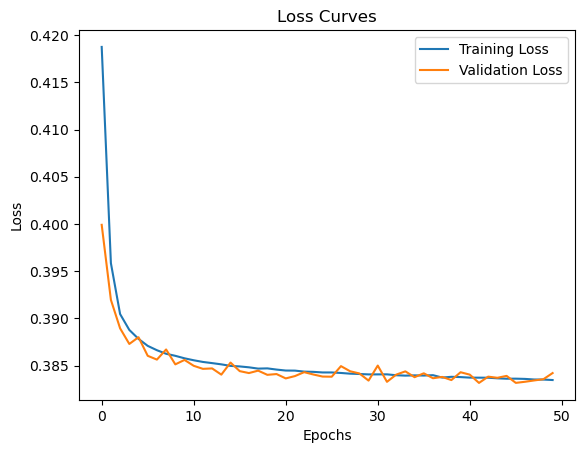

In [118]:
history_dict = ann_model.history

plt.plot(history_dict['loss'], label='Training Loss')
if 'val_loss' in history_dict:
    plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## RNN Model

In [157]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

rnn = Sequential()
rnn.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units=150, return_sequences=True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units=100, return_sequences=True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units=50))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1, activation='sigmoid'))
rnn.compile(optimizer = optimizer, loss = 'binary_crossentropy')
rnn_model = rnn.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 430s 165ms/step - loss: 0.4688 - val_loss: 0.4632
Epoch 2/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 423s 171ms/step - loss: 0.4651 - val_loss: 0.4633
Epoch 3/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 351s 142ms/step - loss: 0.4610 - val_loss: 0.4201
Epoch 4/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 337s 136ms/step - loss: 0.4102 - val_loss: 0.3943
Epoch 5/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 382s 136ms/step - loss: 0.3943 - val_loss: 0.3868
Epoch 6/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 339s 137ms/step - loss: 0.3902 - val_loss: 0.3911
Epoch 7/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 343s 138ms/step - loss: 0.3878 - val_loss: 0.3848
Epoch 8/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 367s 148ms/step - loss: 0.3882 - val_loss: 0.3854
Epoch 9/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 378s 153ms/step - loss: 0.3877 - val_loss: 0.3846
Epoch 10/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 383s 153ms/step - loss: 0.3862 - val_loss: 0.3857
Epoch 11/20
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 351s 141ms/step - loss: 0.3843 - val

In [158]:
y_pred_rnn = rnn.predict(X_test)
rnn_r2 = r2_score(y_test, y_pred_rnn)
print(f"R² Score for RNN Model: {rnn_r2:.4f}")

1550/1550 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step
R² Score for RNN Model: 0.9706


In [150]:
final_df.columns

Index(['Color Score', 'Density', 'Water Content', 'pH',
       'Electrical Conductivity', 'Fructose Level', 'Glucose Level',
       'Viscosity', 'Pollen Analysis_Acacia', 'Pollen Analysis_Alfalfa',
       'Pollen Analysis_Avocado', 'Pollen Analysis_Blueberry',
       'Pollen Analysis_Borage', 'Pollen Analysis_Buckwheat',
       'Pollen Analysis_Chestnut', 'Pollen Analysis_Clover',
       'Pollen Analysis_Eucalyptus', 'Pollen Analysis_Heather',
       'Pollen Analysis_Lavender', 'Pollen Analysis_Manuka',
       'Pollen Analysis_Orange Blossom', 'Pollen Analysis_Rosemary',
       'Pollen Analysis_Sage', 'Pollen Analysis_Sunflower',
       'Pollen Analysis_Thyme', 'Pollen Analysis_Tupelo',
       'Pollen Analysis_Wildflower'],
      dtype='object')

### Save Models for Prediction

In [159]:
# pickle.dump(scaler, open('honey_standardscaler.pkl', 'wb'))
# pickle.dump(dt_reg, open('honey_decisiontree.pkl', 'wb'))
# pickle.dump(rfr, open('honey_randomforest.pkl', 'wb'))
# pickle.dump(gbr, open('honey_gradeintbossing.pkl', 'wb'))
# pickle.dump(xgb_reg, open('honey_XGBoost', 'wb'))
# pickle.dump(grid_xgb, open('honey_XGBoostGrid.pkl', 'wb'))
# ann.save('honey_ann.h5')
# rnn.save('honey_rnn.h5')

In [160]:
lr_acc = r2_score(y_test, y_pred_lr)
dtr_acc = r2_score(y_test, y_pred_dtr)
rfr_acc = r2_score(y_test, y_pred_rfr)
xgb_acc = r2_score(y_test, y_pred_xgb)
ada_acc = r2_score(y_test, y_pred_ada)
gbr_acc = r2_score(y_test, y_pred_gbr)
lr_ls_acc = r2_score(y_test, y_pred_ls)
grid_lr_ls_acc = accuracy_ls
grid_xgb_acc = best_score_grid_xgb
ann_model = ann_acc
rnn_model = rnn_r2

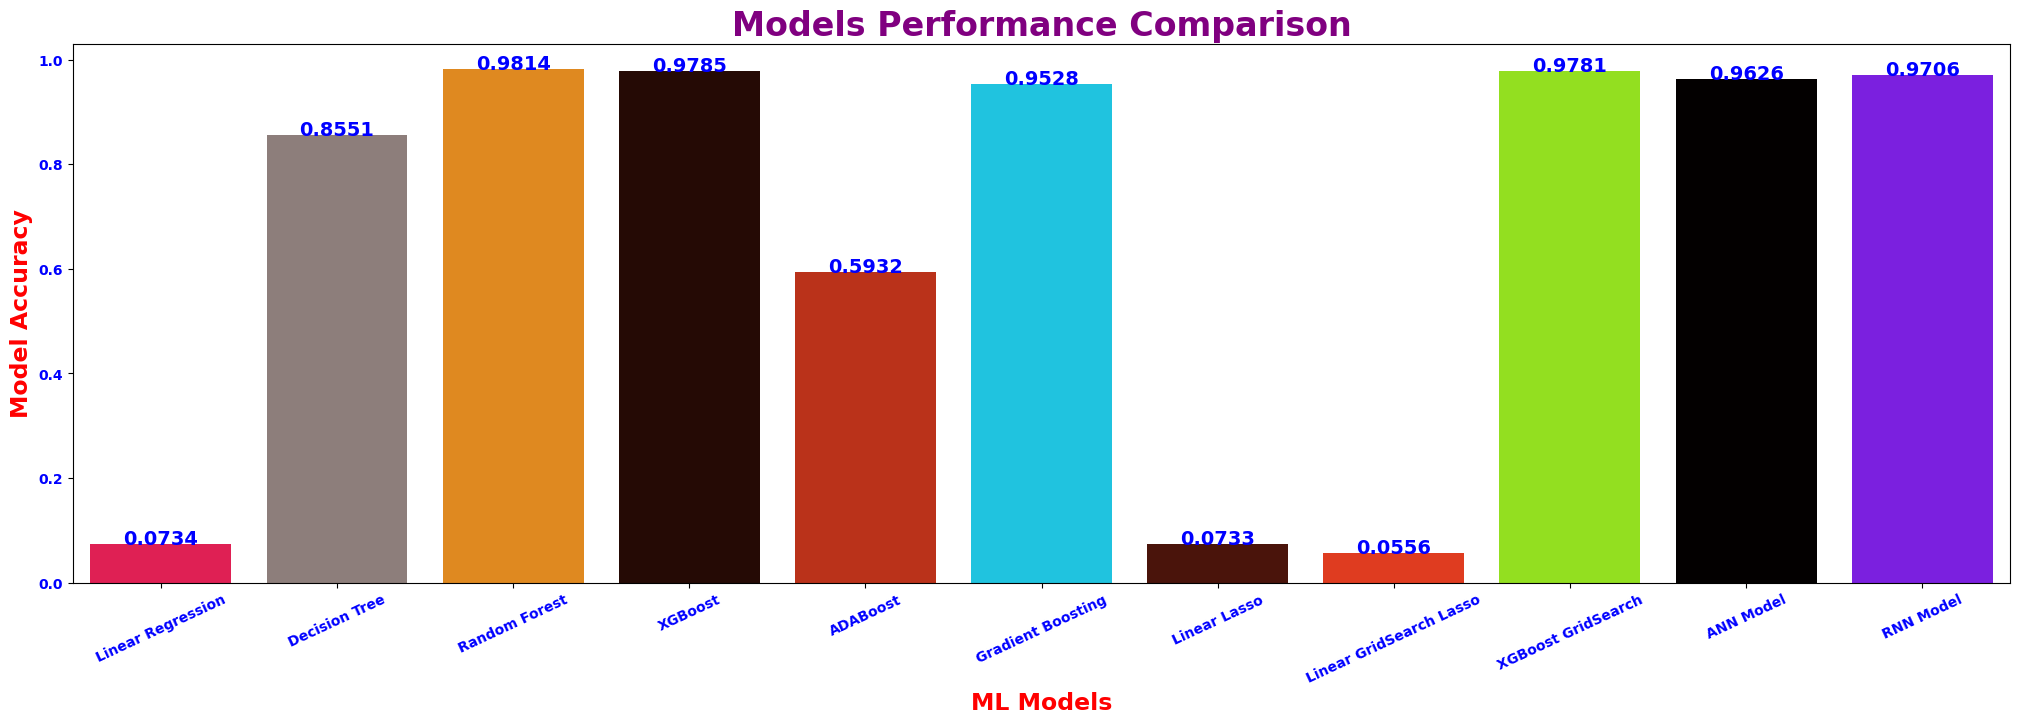

In [161]:
# Visualize Model Score in Bar Graph
colors = ['#ff0045', '#907c78', '#FF8C00', '#2a0600', '#d41f00', '#00daff', '#550c00', '#ff2500', '#9aff00', '#030000', '#7a00ff']

# Plot the performance of different regression models (example)
performance = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'ADABoost', 'Gradient Boosting',
              'Linear Lasso', 'Linear GridSearch Lasso', 'XGBoost GridSearch', 'ANN Model', 'RNN Model'],
    'R2 Score': [lr_acc, dtr_acc, rfr_acc, xgb_acc, ada_acc, gbr_acc, lr_ls_acc, grid_lr_ls_acc, grid_xgb_acc, ann_model, rnn_model]
}
plt.figure(figsize=(25, 7))
performance_df = pd.DataFrame(performance)
sns.barplot(x = 'Model', y = 'R2 Score', data = performance_df, palette = colors)
plt.xticks(rotation=25)
plt.title('Models Performance Comparison', fontweight = 'bold', fontsize = 24, color = 'purple')

# Add labels on bars
for index, row in performance_df.iterrows():
    plt.text(index, row['R2 Score'], round(row['R2 Score'], 4), color = 'blue', ha = "center", fontweight = 'bold', fontsize = 14)
plt.xlabel('ML Models', color = 'red', fontweight='bold', fontsize = 17)
plt.ylabel('Model Accuracy', color = 'red', fontweight = 'bold', fontsize = 17)

plt.xticks(fontweight='bold', color='blue')
plt.yticks(fontweight='bold', color='blue')
plt.show()

In [162]:
# Model accuracies
model_accuracies = {
    'XGBoost': xgb_acc,
    'Random Forest': rfr_acc,
    'Gradiant Boosting': gbr_acc,
    'XGBoost GridSearch': grid_xgb_acc,
    'ANN': ann_model,
    'RNN': rnn_model
}

# Number of models
num_models = len(model_accuracies)

# Create the subplots
fig = make_subplots(
    rows=3, cols=3,
    specs=[[{'type': 'indicator'}]*3 for _ in range(3)],
    subplot_titles=list(model_accuracies.keys())
)

# Add the traces
for i, (model_name, accuracy) in enumerate(model_accuracies.items()):
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=accuracy * 100,  # Convert to percentage
        title={'text': model_name, 'font': {'size': 12}, 'align': 'center'},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "purple"},
            'steps': [
                {'range': [0, 50], 'color': "green"},
                {'range': [50, 100], 'color': "orange"}
            ],
            'threshold': {
                'line': {'color': "black", 'width': 4},
                'thickness': 0.75,
                'value': 90
            }
        }
    ), row=row, col=col)

# Update layout to center the title
fig.update_layout(
    height=1000, width=1000,
    title={
        'text': "Recommended Models Accuracy",
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'font': {'size': 20, 'color': 'blue', 'family': 'Arial, sans-serif'}
    },
    margin=dict(t=100)
)

# Show the figure
fig.show()